In [ ]:
import pandas as pd

liver = pd.read_csv('/content/drive/MyDrive/datasets/indian_liver_patient.csv')

print(liver.Dataset.unique())
liver.head()


[1 2]


,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver.nunique()

Unnamed: 0                    583
Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [ ]:
import numpy as np

liver.Gender = np.where(liver.Gender == 'Female', 0,1)
liver.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
print(liver.isna().sum())

Unnamed: 0                    0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [ ]:
liver.dropna(axis = 0, inplace = True)
print(liver.isna().sum())

Unnamed: 0                    0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 45, test_size = 0.3, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(405, 11) (174, 11) (405,) (174,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform')
clf.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

pred= clf.predict(x_test)

cm = confusion_matrix(y_test, pred)
ps = precision_score(y_test, pred)
acc = accuracy_score(y_test, pred)
rs = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(cm)
print()
print('정밀도: {}%'.format(round(ps*100, 2)))
print('정확도: {}%'.format(round(acc*100, 2)))
print('재현율: {}%'.format(round(rs*100, 2)))
print('f1_score: {}%'.format(round(f1*100, 2)))

[[103  21]
 [ 38  12]]

정밀도: 73.05%
정확도: 66.09%
재현율: 83.06%
f1_score: 77.74%


In [ ]:
import numpy as np

np.random.seed(100)
x = np.sort(5*np.random.rand(400, 1), axis = 0)
t = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

print(x[:10])
print(y[:10])
print(t[:10])

[[0.0024338 ]
 [0.00699512]
 [0.02359428]
 [0.02844254]
 [0.04966847]
 [0.06312915]
 [0.07627486]
 [0.08911592]
 [0.10219566]
 [0.11589068]]
[0.00243379 0.00699506 0.02359209 0.0284387  0.04964805 0.06308723
 0.07620092 0.08899801 0.10201787 0.11563144]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]


###노이즈 추가

In [ ]:
y[::1] += 1 * (0.5 - np.random.rand(400)) #[::1]은 'start:end:step' 형식에서 'step'이 1이므로, 배열의 처음부터 끝까지 한 요소씩 건너뛰지 않고 모두 포함

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


##n_neighbors 매개변수의 최적 값
###데이터셋의 크기와 특성: 데이터셋이 크고 다양한 경우, 더 많은 이웃을 고려하는 것이 유용할 수 있고 반면, 작은 데이터셋에서는 너무 많은 이웃을 사용하면 과적합(overfitting)의 위험이 있음.

###잡음(Noise)과 이상치(Outliers): 데이터에 잡음이 많거나 이상치가 존재하는 경우, 더 많은 이웃을 고려하는 것이 좋을 수 있으나. 이는 개별적인 잡음이나 이상치의 영향을 줄여줌.

###모델의 복잡도: 일반적으로 n_neighbors가 작으면 모델은 더 복잡해지고, 크면 더 단순해지지만. 작은 n_neighbors 값은 학습 데이터에 더 민감하게 반응하여 과적합을 일으킬 수 있음.

###가중치 방식: weights='uniform'은 모든 이웃이 동일한 중요도를 갖는다는 것을 의미하고, weights='distance'는 가까운 이웃에 더 높은 가중치를 부여함. distance 가중치를 사용할 때는 일반적으로 더 작은 n_neighbors 값을 사용할 수 있음.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors = 20, weights = 'uniform')
knn_dis = KNeighborsRegressor(n_neighbors = 20, weights ='distance')

knn_uni.fit(x_train, y_train)
knn_dis.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

uni_pred = knn_uni.predict(x_test)
dis_pred = knn_dis.predict(x_test)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse','mae','rmse', 'r2']

result =pd.DataFrame(index = weights, columns = evls)

for pred, nm in zip(preds, weights):
  mse = mean_squared_error(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(x_test, pred)

  result.loc[nm]['mse'] = round(mse, 2)
  result.loc[nm]['mae'] = round(mae, 2)
  result.loc[nm]['rmse'] = round(rmse, 2)
  result.loc[nm]['r2'] = round(r2, 2)

result

# R² 값이 항상 모든 상황에서 유용한 지표는 아님.
# 특히 K-최근접 이웃과 같은 비선형 모델에서는 R²값이 모델의 성능을 정확하게 반영하지 못할 수 있음
#KNN 모델의 성능을 평가할 때는 R²뿐만 아니라 다른 여러 지표들(MSE, RMSE, MAE 등)을 함께 고려하는 것이 중요

,mse,mae,rmse,r2
uniform,0.08,0.25,0.29,-4.15
distance,0.09,0.26,0.3,-4.12


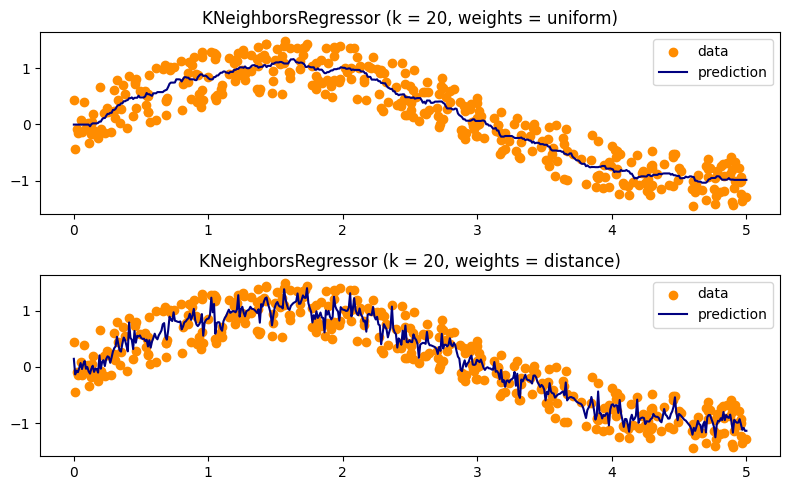

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))

for i, weights in enumerate(['uniform', 'distance']):
  knn = KNeighborsRegressor(n_neighbors = 20, weights = weights)
  y_ = knn.fit(x, y).predict(t) #t = np.linspace(0, 5, 500)[:, np.newaxis]
  plt.subplot(2, 1, i +1)
  plt.scatter(x, y, color = 'darkorange', label = 'data')
  plt.plot(t, y_, color = 'navy', label = 'prediction')
  plt.axis('tight')
  plt.legend()
  plt.title('KNeighborsRegressor (k = %i, weights = %s)'%(20, weights))
plt.tight_layout()
plt.show()

#최적의 n_neighbors 값을 찾기 위해서는 교차 검증(cross-validation)과 같은 방법이 필요함

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 데이터셋 로드
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# n_neighbors 값을 다양하게 설정하여 교차 검증 수행
neighbors_settings = range(1, 11)
cv_scores = []

for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    scores = cross_val_score(knn, X, y, cv=5) # 5-폴드 교차 검증
    cv_scores.append(scores.mean())

best_n_neighbors = neighbors_settings[cv_scores.index(max(cv_scores))]
print(f"Best n_neighbors: {best_n_neighbors}")

Best n_neighbors: 10
